# COGS 108 - Final Project 

# Overview

In order to identify the potential bias derived from location we must test the difference between scores for restaurants located in higher and lower income groups. To do this we analyse the distribution of scores for both groups along with a two sample t test to see if our difference is significant enough to suggest a bias. Initially we see signs that lead us against our hypothesis. Then we learn that our initial thought of bias in the favor of the higher income group was wrong and in fact there is a bias but in favor of the lower income group.

# Name & GitHub

- Name: Aurelio Barrios
- ID: A15290207
- GitHub Username: aubarrio

# Research Question

Does the health inspection grade of a restaurant differ based on where the restaurant is located? How would the median household income of an area affect the health inspection grade of restaurants in that area?

## Background and Prior Work

Health inspection grades are usually the first thing people notice before entering a restaurant. With health inspections usually taking place once every six months, the result of a health inspection can severely affect a restaurant. Whilst restaurants are waiting for a health inspection in order to improve their score they could potentially be losing customers. This is why it is essential for health inspectors to give a grade that accurately reflects the condition of a restaurant. With that being said humans are susceptible to biases. In order to prevent damage towards restaurants and restaurant owners it is important to consider how these biases affect health inspectors. Location, location, location! This is a common saying in the real estate business, this is because the price of a property heavily depends on where the property is located. Two houses can be identical but will vary in price due to their location. In order to be fair we must question how factors such as location can affect how a health inspector does their job. If we were to have two identical restaurants and place one restaurant in a low income area while placing the other in a high income area we should expect their scores to be the same, but would they be? Every restaurant is located somewhere, this is why we should understand what role location has to play when it comes to health inspections. 

The first reference listed below is an article about how data scientists that were trying to predict real estate market prices using machine learning discovered that restaurant health inspection results helped their model make better predictions. This article makes it clear that there is a relationship between health inspection results and the surrounding real estate market of that restaurant. Now does the health inspection result affect the surrounding market or vice versa? The article found that generally when the health inspection result of a restaurant was better the price of real estate around that restaurant was higher. They state, “it’s clear that nice restaurants and nice neighborhoods often go together.” This article makes it clear that restaurants with better health inspection results tend to be in better areas. It is the goal of this project to determine if there is a bias that leads to restaurants receiving a better health inspection result due to being located in a better area. The work mentioned in the article is a great precedent in showing how health inspection results are related to the surrounding economy. 

In order to improve health inspections it is important to understand how the inspections are done. If there is some bias between the inspector and in what city the restaurant is located, it is crucial to uncover this in order to make the inspections fair. Understanding how the surrounding economy affects health inspection results of restaurants allows for more fairness for those restaurants that are in lower income areas. This brings me to another previous work done on this topic which shows how restaurants in higher income areas have an advantage over those in lower income areas.

The second reference is a little less related to my topic of analysis but it still provides some insights into why I chose my analysis. The article is about how the website Yelp was choosing to alert its users about restaurants that had a low grade on their health inspection. The website would alert users when they were viewing a restaurant that had an inspection score of C or worse. What was shocking about this article and what drove me to approach the data analysis in this way was the mention of a particular restaurant in Beverly Hills. The article states, "one prominent Beverly Hills restaurant got a C rating last October, but then paid a fee for reinspection and got an A." My analysis is exploring health inspection codes in different income areas precisely because of this mention in the article. Thinking of restaurants that are in lower income areas unlike Beverly Hills that may be struggling to survive as a business, it seems hard to believe that these restaurants could afford to pay for a reinspection in order to improve their score. It made me think of all the restaurants that are in higher income areas like Beverly Hills that possibly paid a fee for re-inspection in order to improve their score. 


References (include links):
- 1) https://www.marketwatch.com/story/how-data-scientists-found-a-link-between-restaurant-inspections-and-new-yorks-wild-real-estate-market-2020-02-03
- 2) https://www.nbclosangeles.com/investigations/yelp-warns-consumers-about-la-restaurants-with-bad-grades/2296465/

# Hypothesis


A health inspection grade may already be given even before the inspector steps foot in the restaurant. Generally restaurants in higher income areas are thought of as fancier and therefore may be graded more leniently when they are being inspected. Restaurants that are in higher income areas will have a higher inspection grade than those that are in lower income areas due to the implicit bias associated with fancier areas.

# Dataset(s)

- Dataset Name: inspections.csv
- Number of observations: 18,466

The inspections dataset holds records of inspections that have taken place. For each inspection there is information provided on the overall score of an inspection, where the inspection took place and more. 

Features being used:
- zip: the zipcode of the restaurant inspected
- score: the score the restaurant received
- num_critical: number of critical violations
- num_non_critical: number of non critical violations
- critical: whether or not inspection was found critical


- Dataset Name: zipcodes.csv
- Number of observations:38

The zipcodes dataset provides information on 38 zipcodes of the North Carolina area. This dataset gives information on income levels per family or household, percentages of families below the poverty line, percent of non white residents. 

Features being used:
- zip: the zipcode of the observation
- median_family_income_dollars: the median family income in dollars
- median_household_income_dollars: the median household income in dollars

In order to have a complete dataset for this analysis we must merge the information provided in the inspections and zipcodes dataset. This will allow for a dataset that has information on health inspections per restaurant along with information on the income levels where that restaurant is located which is essential for the analysis.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
inspections = pd.read_csv('data/inspections.csv')
zipcodes = pd.read_csv('data/zipcodes.csv')

# Data Cleaning

There was a minimal amount of cleaning that went along with these datasets as these datasets were fairly clean already. In order to perform the analysis there needed to be a joint dataset that had all the essential information from the inspections and zipcodes datasets. This was the first step in the data pre-processing.

In [3]:
#essential columns that we need from inspections dataset
inspection_cols = ['zip', 'score', 'num_critical', 'num_non_critical', 'critical']
inspections = inspections[inspection_cols]

#merge zipcode and inspections dataset into one dataset
data = pd.merge(inspections, zipcodes, on='zip')

In order to make things easier in the future some more pre-processing was needed. The only thing that was missing from this dataset was a distinguisher of income class for each zip code. There were no provided income classes so in order to separate zip codes into lower or higher income classes we classified each zip code depending on if the median income for that zipcode was lower or higher than the median of all median incomes in the dataset. Lastly we separated the data into two other datasets according to income class level to make things easier in the future.

In [4]:
#next we must separate into lower income and higher income, we separate by the median median_household_income
median_median_household_income = zipcodes['median_household_income_dollars'].describe()['50%']

#add a column separating by income level
data['class_level'] = data['median_household_income_dollars'].apply(lambda x: "Lower Income" 
                if x < median_median_household_income else "Higher Income")

#make two different dataframes based on income level
lower_income = data[data['class_level'] == 'Lower Income']
higher_income = data[data['class_level'] == 'Higher Income']

The original dataset was already a good dataset. For all of the features that were necessary to this analysis there were no missing values. The only downfall of the dataset was that the original inspections dataset had zipcode values that we did not have information for in the zipcodes dataset. Therefore these values were dropped when we merged the two datasets together.

# Data Analysis & Results

Now that we have a complete dataset it is important to get a better understanding of our data. In order to perform our analysis we must understand how our distribution of scores differs between the lower and higher income groups. To do this we take a look at the distribution of scores, key values of scores and how scores and income are related.

In the density plot below we see the distributions of scores for the lower and higher income groups. As we can see from the plot the lower income group has a higher density than the higher income group for scores approximately between 95 and 98. We can also see that as we move away from scores of 95 towards scores less than 95 the density of the higher income group is always higher or equal to the density of the lower income group. What we are seeing is that lower income groups are getting higher rated scores than the higher income group while the higher income group is getting more lower rated scores than the lower income group. This is shocking news according to my initial thoughts, I was expecting it to be the opposite.

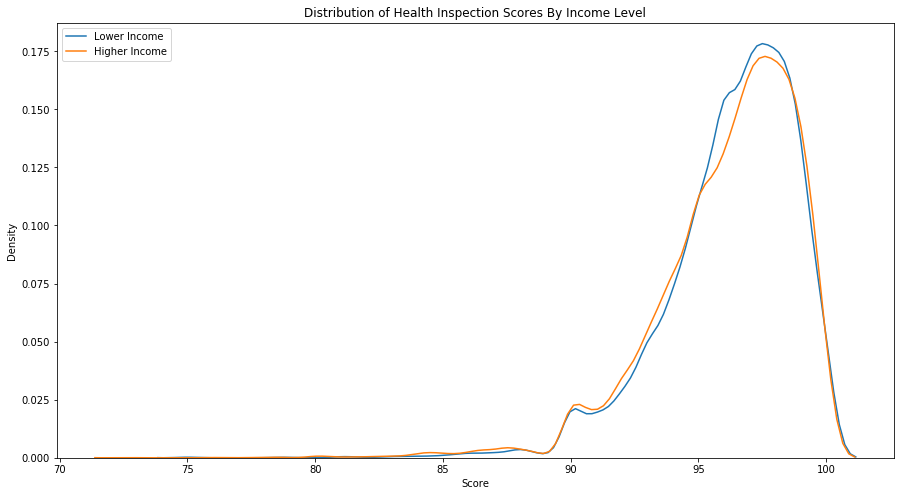

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(data[data['class_level'] == 'Lower Income']['score'], label='Lower Income', ax=ax)
sns.kdeplot(data[data['class_level'] == 'Higher Income']['score'], label='Higher Income', ax=ax)

plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Distribution of Health Inspection Scores By Income Level')
plt.legend(loc='upper left')

I wanted to see how some statistics differed between the two income groups. These statistics were the maximum, average and minimum scores for both groups. In the plot below we look for any shocking differences between the values of each statistic and the groups. As we can see both the maximum and average scores are nearly if not exactly the same. The key difference we see is the minimum score received for the lower and higher income groups. The higher income group has had a harsher score than the lower income group.

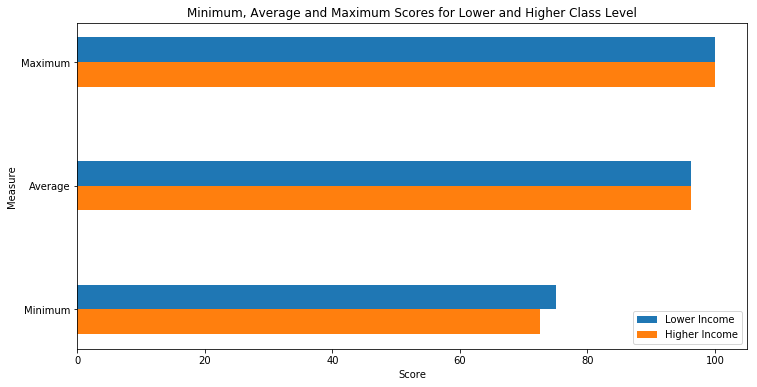

In [6]:
measure = ['min', 'avg', 'max']
class_d = []
#draw horizontal side by side chart of min max and average for lower and higher income
for name, group in data.groupby('class_level'):
    class_d.append([min(group['score']), np.mean(group['score']), max(group['score'])])

pos = list(range(len(measure)))    
width = 0.2    
    
fig, ax = plt.subplots(figsize=(12, 6))
plt.barh([p + width for p in pos], class_d[1], width, label='Lower Income')
plt.barh(pos, class_d[0], width, label='Higher Income')

ax.set_xlabel('Score')
ax.set_ylabel('Measure')
ax.set_title('Minimum, Average and Maximum Scores for Lower and Higher Class Level')
ax.set_yticks([p + 0.5 * width for p in pos])

ax.set_yticklabels(['Minimum', 'Average', 'Maximum'])

plt.legend(loc='lower right')

From the previous plot we saw that the higher income group had a minimum score value that differed than the minimum score value for the lower income group. The graph below explores deeper to better understand if this is some outlier or if there really is a difference. As we can see from the graph the score values of the higher income group have more values in the lower end than the lower income group. This graph along with the graphs above are showing a clear pattern, one which is going against my hypothesis.

Text(0.5,1,'Scatter Plot Of Scores and Median Household Income')

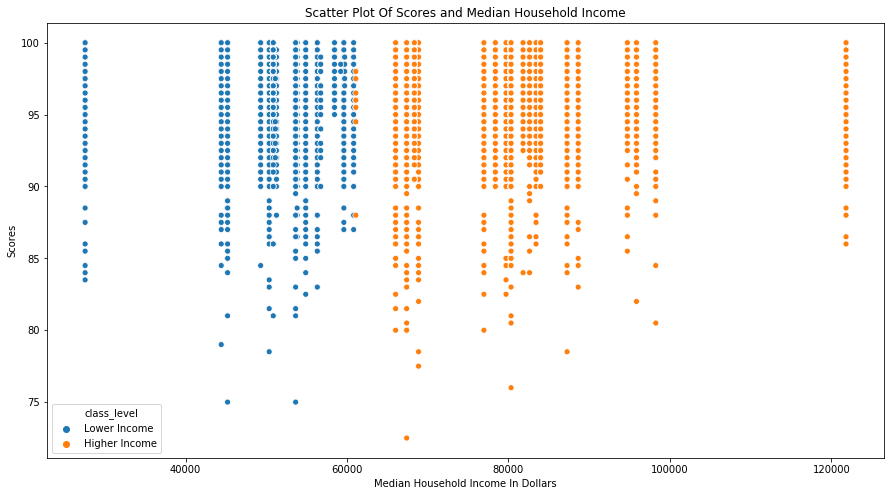

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.scatterplot(x="median_household_income_dollars", y="score", hue="class_level", data=data, ax=ax)

ax.set_xlabel('Median Household Income In Dollars')
ax.set_ylabel('Scores')
ax.set_title('Scatter Plot Of Scores and Median Household Income')

So far we have seen patterns that suggest that higher income areas tend to get lower scores, something which is the opposite to my initial thought. This is suggesting that higher income areas are getting graded harsher. We must determine if what we are seeing is significant enough to conclude that there is bias in our health inspections.

To do this we conduct a two sample t-test comparing the average score rating received for lower and higher income groups.
- Our null hypothesis claims that the average score rating for lower and higher income groups is the same.
- Our alternative hypothesis claims that the average score rating for lower and higher income groups is not the same.

We conduct this test with a significance value of 0.05.

In [8]:
#begin two sample t-test
low_distr = lower_income['score'].describe()
high_distr = higher_income['score'].describe()

low_n = low_distr['count']
low_mean = low_distr['mean']
low_sd = low_distr['std']

high_n = high_distr['count']
high_mean = high_distr['mean']
high_sd = high_distr['std']

#TODO make sure we put the t value formula
t_stat = (low_mean - high_mean) / np.sqrt(((low_sd) ** 2 / low_n) + ((high_sd) ** 2 / high_n))

pval = stats.t.sf(t_stat, min(low_n, high_n) - 1) * 2
print('p-value: ' + str(pval))

p-value: 0.0011163106121571608


From the t-test result above we get a p-value of about 0.001117, which is lower than our significance value. This means that we can reject our null hypothesis in favor of the alternative that the average scores for lower and higher income groups are not the same. As we can see there is some bias that is altering the scores each income level receives. We can see that higher income groups will on average get lower scores than lower income groups.

# Ethics & Privacy

This analysis tries to understand bias in the health inspection process. When we question whether there is bias in a health inspection we are questioning the health inspectors themselves. This could jeopardize the jobs of these inspectors. If it is found that there is bias in a health inspection would that mean that health inspectors would get fired? Overall it is not the goal of this analysis to get any inspector fired, but there is a real possibility. This analysis tries to protect health inspectors by not using any information about inspectors other than the score they have given. 

It is also important to consider the ethics behind the data. To begin with income is always a touchy subject. When dealing with income there are many issues to consider, such as whether or not a person would like to give information about his/her income. There could be people that would prefer not to give information on their income maybe because their income is too low or too high. There is also an issue on how the information is collected. Would a person with a low income be able to give information about their income? What if a person has no income, would they be counted/considered? Data collected must be reflective of the population. 

When we collect the income data we must reference it to a particular location. This is because we are using restaurant information and income information from a certain neighborhood. When we collect income information we must know what neighborhood that income belongs to. There might be concerns of privacy here, where someone might be concerned addresses are being used. Although for our analysis it is important to know where the income belongs to, the exact location is not so important. We can attribute income to a general area so that there are no concerns with privacy. Most of the ethical implications would come from the collection of income due to the fact that most of the information we need of restaurants is public. For example restaurant addresses are public which will allow us to determine what neighborhood the restaurant belongs to. Restaurant health scores are also public.

# Conclusion & Discussion

The goal of this analysis was to determine if there were biases that affected how a score was given based on the location of a restaurant. Going into this project my initial thoughts were that restaurants in lower income areas would have lower scores due to their location. After careful analysis I found that there is some bias in scores for different income groups but not in the way I initially thought. It seems that the bias goes against restaurants in higher income areas rather than restaurants in lower income areas. 

It is important to consider that there are limitations to this analysis. For one this particular dataset belongs to restaurants in North Carolina. This is a small subset of all the restaurants out there. So although we found that restaurants in higher income groups were receiving lower scores than those in lower income groups this is for our dataset only and it is not to say that all restaurants located in higher income groups are receiving lower scores than those not in higher income groups. It is also important to recognize that there other variables that could lead to biases in health inspections, removing these biases will make a fairer environment.
